<a href="https://colab.research.google.com/github/vaas-umputer/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import plotly.express as px

In [ ]:
# read the datafile
df_initial = pd.read_csv('customer-data.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})

In [ ]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
df_initial.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
df_initial.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
print(df_initial.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df_initial.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [ ]:
for index,row in df_initial.iterrows():
  if pd.isnull(row['CustomerID']) or pd.isnull(row['Description']):
    print(row)

Streaming output truncated to the last 5000 lines.
UnitPrice                      5.06
CustomerID                      NaN
Country              United Kingdom
Name: 6963, dtype: object
InvoiceNo                                  536982
StockCode                                  85123a
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                       35
InvoiceDate                       12/3/2010 14:27
UnitPrice                                    6.77
CustomerID                                    NaN
Country                            United Kingdom
Name: 6964, dtype: object
InvoiceNo                              536991
StockCode                               22572
Description    ROCKING HORSE GREEN CHRISTMAS 
Quantity                                    4
InvoiceDate                   12/3/2010 15:16
UnitPrice                                0.85
CustomerID                                NaN
Country                        United Kingdom
Name: 7141, dtype: ob

KeyboardInterrupt: 

In [ ]:
len(df_initial)

541909

In [ ]:
df_initial.dropna(axis=0,subset=['CustomerID'],inplace=True)


In [ ]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
df_initial.shape

(406829, 8)

In [ ]:
print(df_initial.duplicated().sum())

5225


In [ ]:
df_initial.drop_duplicates(inplace=True)

In [ ]:
df_initial.shape

(401604, 8)

In [ ]:
temp=df_initial.groupby(['InvoiceNo','CustomerID','Country']).value_counts()

In [ ]:
temp.head()

InvoiceNo  CustomerID  Country         StockCode  Description                          Quantity  InvoiceDate     UnitPrice
536365     17850       United Kingdom  21730      GLASS STAR FROSTED T-LIGHT HOLDER    6         12/1/2010 8:26  4.25         1
                                       22752      SET 7 BABUSHKA NESTING BOXES         2         12/1/2010 8:26  7.65         1
                                       85123A     WHITE HANGING HEART T-LIGHT HOLDER   6         12/1/2010 8:26  2.55         1
                                       84406B     CREAM CUPID HEARTS COAT HANGER       8         12/1/2010 8:26  2.75         1
                                       84029G     KNITTED UNION FLAG HOT WATER BOTTLE  6         12/1/2010 8:26  3.39         1
Name: count, dtype: int64

In [ ]:
twmp=df_initial[['InvoiceNo','CustomerID','Country']].groupby(['InvoiceNo','CustomerID','Country']).value_counts()

In [ ]:
print(twmp)

InvoiceNo  CustomerID  Country       
536365     17850       United Kingdom     7
536366     17850       United Kingdom     2
536367     13047       United Kingdom    12
536368     13047       United Kingdom     4
536369     13047       United Kingdom     1
                                         ..
C581484    16446       United Kingdom     1
C581490    14397       United Kingdom     2
C581499    15498       United Kingdom     1
C581568    15311       United Kingdom     1
C581569    17315       United Kingdom     2
Name: count, Length: 22190, dtype: int64


In [ ]:
print(twmp.index)

MultiIndex([( '536365', '17850', 'United Kingdom'),
            ( '536366', '17850', 'United Kingdom'),
            ( '536367', '13047', 'United Kingdom'),
            ( '536368', '13047', 'United Kingdom'),
            ( '536369', '13047', 'United Kingdom'),
            ( '536370', '12583',         'France'),
            ( '536371', '13748', 'United Kingdom'),
            ( '536372', '17850', 'United Kingdom'),
            ( '536373', '17850', 'United Kingdom'),
            ( '536374', '15100', 'United Kingdom'),
            ...
            ('C581464', '15951', 'United Kingdom'),
            ('C581465', '15755', 'United Kingdom'),
            ('C581466', '13883', 'United Kingdom'),
            ('C581468', '13599', 'United Kingdom'),
            ('C581470', '17924', 'United Kingdom'),
            ('C581484', '16446', 'United Kingdom'),
            ('C581490', '14397', 'United Kingdom'),
            ('C581499', '15498', 'United Kingdom'),
            ('C581568', '15311', 'United Kingdom

In [ ]:
twmp=twmp.reset_index(drop=False)

In [ ]:
twmp.index

RangeIndex(start=0, stop=22190, step=1)

In [ ]:
twmp.head()

,InvoiceNo,CustomerID,Country,count
0,536365,17850,United Kingdom,7
1,536366,17850,United Kingdom,2
2,536367,13047,United Kingdom,12
3,536368,13047,United Kingdom,4
4,536369,13047,United Kingdom,1


In [ ]:
twmp.shape

(22190, 4)

In [ ]:
countries=twmp['Country'].value_counts()
print(countries)
print(len(countries))

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                71
Portugal                   70
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Singapore                  10
Malta                      10
Unspecified                 8
Iceland                     7
USA                         7
Canada                      6
Greece                      6
Israel                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Ba

In [ ]:
countries

,count
Country,
United Kingdom,19857
Germany,603
France,458
EIRE,319
Belgium,119
Spain,105
Netherlands,101
Switzerland,71
Portugal,70


In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Data for the map
data = go.Choropleth(
    locations=countries.index,
    locationmode='country names',
    z=countries,
    text=countries.index,
    colorbar_title='Order Count',
    colorscale='Reds'
)

# Layout for the map
layout = go.Layout(
    title='Number of Orders per Country',

)

# Combine data and layout, and plot the map
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)

purchases ia largely dominated by the UK


In [ ]:
df_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
vtemp=df_initial[['InvoiceNo','CustomerID']].groupby(['InvoiceNo','CustomerID']).value_counts()
vtemp.head()

,,count
InvoiceNo,CustomerID,
536365,17850,7
536366,17850,2
536367,13047,12
536368,13047,4
536369,13047,1


In [ ]:
vtemp.head()

,,count
InvoiceNo,CustomerID,
536365,17850,7
536366,17850,2
536367,13047,12
536368,13047,4
536369,13047,1


In [ ]:
vtemp=vtemp.reset_index(drop=False)

In [ ]:
vtemp.sort_values('CustomerID')

,InvoiceNo,CustomerID,count
1909,541431,12346,1
18958,C541433,12346,1
2205,542237,12347,29
10173,562032,12347,22
548,537626,12347,31
...,...,...,...
8040,556731,18283,24
2054,541854,18283,44
13860,570715,18287,38
14889,573167,18287,3


In [ ]:
vtemp['CustomerID'].value_counts()

,count
CustomerID,
14911,248
12748,224
17841,169
14606,128
13089,118
...,...
16178,1
12864,1
16305,1


This shows that we have both frequent and infrequent customers


In [ ]:
#determine how purchases are divided according to purchase prices


count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64


Doing segmentation based on the total proce by each customer

In [ ]:
#add a new column to original
df_cleaned=df_initial.copy(deep=True)
df_cleaned['TotalPurchase']=df_cleaned['Quantity']*df_cleaned['UnitPrice']
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [ ]:
customer_purchases=df_cleaned.groupby('CustomerID')['TotalPurchase'].sum().reset_index()

In [ ]:
customer_purchases

,CustomerID,TotalPurchase
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2045.53


In [ ]:
max(customer_purchases['TotalPurchase'])

279489.02

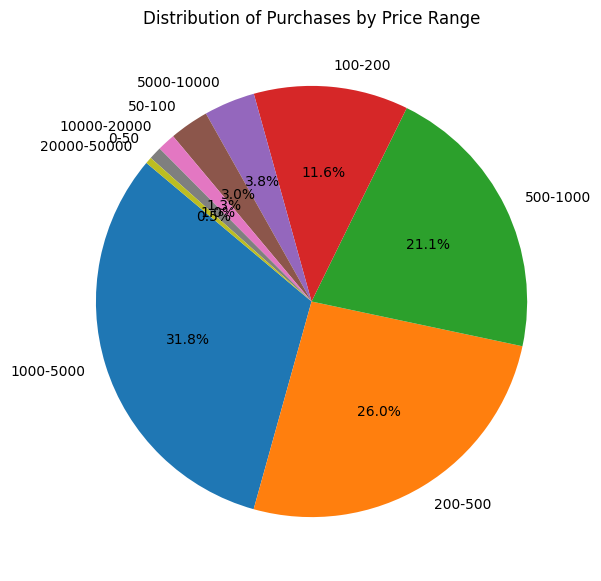

In [ ]:
import matplotlib.pyplot as plt
bins=[0,50,100,200,500,1000,5000,10000,20000,50000]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000','1000-5000','5000-10000','10000-20000','20000-50000']
customer_purchases['bins'] = pd.cut(customer_purchases['TotalPurchase'], bins=bins, labels=labels)
bin_counts=customer_purchases['bins'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchases by Price Range')
plt.show()

majority of the customers purchase in the range of 500 to 5000

In [ ]:
# Group by CustomerID to calculate frequency and monetary value
customer_summary = df_initial.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Frequency of purchases
    'Quantity': 'sum',       # Total quantity purchased
    'UnitPrice': 'sum'       # Monetary value spent
}).reset_index()

# Rename columns for clarity
customer_summary.columns = ['CustomerID', 'Frequency', 'TotalQuantity', 'TotalSpent']

# Add a Loyalty flag based on frequency (e.g., more than 5 purchases = loyal)
customer_summary['Loyalty'] = customer_summary['Frequency'].apply(lambda x: 'Loyal' if x > 5 else 'Not Loyal')


In [ ]:
customer_summary

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty
0,12346,2,0,2.08,Not Loyal
1,12347,7,2458,481.21,Loyal
2,12348,4,2341,178.71,Not Loyal
3,12349,1,631,605.10,Not Loyal
4,12350,1,197,65.30,Not Loyal
...,...,...,...,...,...
4367,18280,1,45,47.65,Not Loyal
4368,18281,1,54,39.36,Not Loyal
4369,18282,3,98,62.68,Not Loyal
4370,18283,16,1357,1174.33,Loyal


In [ ]:
customer_summary.sort_values('Frequency',ascending=False)

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty
1895,14911,248,77155,31025.29,Loyal
330,12748,224,23750,14698.31,Loyal
4042,17841,169,22628,19956.37,Loyal
1674,14606,128,5941,7778.46,Loyal
568,13089,118,30742,5155.75,Loyal
...,...,...,...,...,...
1141,13877,1,108,3.53,Not Loyal
2997,16400,1,172,87.41,Not Loyal
1142,13878,1,463,166.76,Not Loyal
1149,13886,1,126,60.88,Not Loyal


In [ ]:
# Create a new column to indicate whether a purchase involved a discount
df_cleaned['Discount'] = df_cleaned['Description'].str.contains('DISCOUNT', case=False, na=False).astype(int)

# Filter data for purchases with and without discounts
discounted_purchases = df_cleaned[df_cleaned['Discount'] == 1]
regular_purchases = df_cleaned[df_cleaned['Discount'] == 0]



In [ ]:
discounted_purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,Discount
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom,-27.50,1
9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527,United Kingdom,-29.29,1
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498,United Kingdom,-281.00,1
19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340,United Kingdom,-267.12,1
31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422,United Kingdom,-5.76,1
...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,11/18/2011 12:06,19.82,14527,United Kingdom,-19.82,1
479869,C577227,D,Discount,-1,11/18/2011 12:06,16.76,14527,United Kingdom,-16.76,1
493613,C578239,D,Discount,-1,11/23/2011 12:29,26.33,14912,Italy,-26.33,1
516221,C579884,D,Discount,-1,11/30/2011 17:34,20.53,14527,United Kingdom,-20.53,1


In [ ]:
regular_purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,Discount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60,0


In [ ]:
# Calculate the frequency for each group
discounted_freq = discounted_purchases.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()
regular_freq = regular_purchases.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()



In [ ]:
discounted_freq

,CustomerID,InvoiceNo
0,12830,1
1,12901,1
2,13137,1
3,13316,1
4,13408,4
5,13694,2
6,14031,1
7,14527,28
8,14646,1
9,14911,1


In [ ]:
regular_freq

,CustomerID,InvoiceNo
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [ ]:
# Check the first few rows of customer_summary and discounted_freq
print(customer_summary.head())
print(discounted_freq.head())

# Check if 'CustomerID' exists in both DataFrames
print(customer_summary.columns)
print(discounted_freq.columns)

  CustomerID  Frequency  TotalQuantity  TotalSpent    Loyalty  InvoiceNo
0      12346          2              0        2.08  Not Loyal        NaN
1      12347          7           2458      481.21      Loyal        NaN
2      12348          4           2341      178.71  Not Loyal        NaN
3      12349          1            631      605.10  Not Loyal        NaN
4      12350          1            197       65.30  Not Loyal        NaN
  CustomerID  InvoiceNo
0      12830          1
1      12901          1
2      13137          1
3      13316          1
4      13408          4
Index(['CustomerID', 'Frequency', 'TotalQuantity', 'TotalSpent', 'Loyalty',
       'InvoiceNo'],
      dtype='object')
Index(['CustomerID', 'InvoiceNo'], dtype='object')


In [ ]:
# Ensure CustomerID is a string in both DataFrames
customer_summary['CustomerID'] = customer_summary['CustomerID'].astype(str)
discounted_freq['CustomerID'] = discounted_freq['CustomerID'].astype(str)


In [ ]:
# Merge with the main customer summary
customer_summary = customer_summary.merge(discounted_freq, on='CustomerID', how='left', suffixes=('', '_Discount'))




In [ ]:
customer_summary

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty,InvoiceNo,InvoiceNo_Discount
0,12346,2,0,2.08,Not Loyal,NaN,NaN
1,12347,7,2458,481.21,Loyal,NaN,NaN
2,12348,4,2341,178.71,Not Loyal,NaN,NaN
3,12349,1,631,605.10,Not Loyal,NaN,NaN
4,12350,1,197,65.30,Not Loyal,NaN,NaN
...,...,...,...,...,...,...,...
4367,18280,1,45,47.65,Not Loyal,NaN,NaN
4368,18281,1,54,39.36,Not Loyal,NaN,NaN
4369,18282,3,98,62.68,Not Loyal,NaN,NaN
4370,18283,16,1357,1174.33,Loyal,NaN,NaN


In [ ]:
customer_summary = customer_summary.merge(regular_freq, on='CustomerID', how='left', suffixes=('', '_Regular'))

In [ ]:
customer_summary

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty,InvoiceNo,InvoiceNo_Discount,InvoiceNo_Regular
0,12346,2,0,2.08,Not Loyal,NaN,NaN,2
1,12347,7,2458,481.21,Loyal,NaN,NaN,7
2,12348,4,2341,178.71,Not Loyal,NaN,NaN,4
3,12349,1,631,605.10,Not Loyal,NaN,NaN,1
4,12350,1,197,65.30,Not Loyal,NaN,NaN,1
...,...,...,...,...,...,...,...,...
4367,18280,1,45,47.65,Not Loyal,NaN,NaN,1
4368,18281,1,54,39.36,Not Loyal,NaN,NaN,1
4369,18282,3,98,62.68,Not Loyal,NaN,NaN,3
4370,18283,16,1357,1174.33,Loyal,NaN,NaN,16


In [ ]:
customer_summary['InvoiceNo_Discount'].fillna(0)

,InvoiceNo_Discount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4367,0.0
4368,0.0
4369,0.0
4370,0.0


In [ ]:
customer_summary['InvoiceNo_Discount'].unique()

array([ 0.,  1.,  4.,  2., 28.,  3.,  6.])

In [ ]:
customer_summary

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty,InvoiceNo,InvoiceNo_Discount,InvoiceNo_Regular,Frequency_Increase_Due_to_Discount
0,12346,2,0,2.08,Not Loyal,NaN,0.0,2,False
1,12347,7,2458,481.21,Loyal,NaN,0.0,7,False
2,12348,4,2341,178.71,Not Loyal,NaN,0.0,4,False
3,12349,1,631,605.10,Not Loyal,NaN,0.0,1,False
4,12350,1,197,65.30,Not Loyal,NaN,0.0,1,False
...,...,...,...,...,...,...,...,...,...
4367,18280,1,45,47.65,Not Loyal,NaN,0.0,1,False
4368,18281,1,54,39.36,Not Loyal,NaN,0.0,1,False
4369,18282,3,98,62.68,Not Loyal,NaN,0.0,3,False
4370,18283,16,1357,1174.33,Loyal,NaN,0.0,16,False


In [ ]:
discounted_freq

,CustomerID,InvoiceNo
0,12830,1
1,12901,1
2,13137,1
3,13316,1
4,13408,4
5,13694,2
6,14031,1
7,14527,28
8,14646,1
9,14911,1


In [ ]:
regular_freq

,CustomerID,InvoiceNo
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [ ]:
# Fill missing values with 0 (customers who had no discounted/regular purchases)
customer_summary[['InvoiceNo_Discount', 'InvoiceNo_Regular']] = customer_summary[['InvoiceNo_Discount', 'InvoiceNo_Regular']].fillna(0)


In [ ]:
# Identify if frequency increase is due to discounts
customer_summary['Frequency_Increase_Due_to_Discount'] = customer_summary['InvoiceNo_Discount'] > customer_summary['InvoiceNo_Regular']

# Analyze loyalty vs. discount impact
loyal_customers = customer_summary[customer_summary['Loyalty'] == 'Loyal']
non_loyal_customers = customer_summary[customer_summary['Loyalty'] == 'Not Loyal']




In [ ]:
customer_summary['Frequency_Increase_Due_to_Discount'].unique()

array([False])

In [ ]:
loyal_customers['Frequency_Increase_Due_to_Discount'].unique()

array([False])

In [ ]:
non_loyal_customers['Frequency_Increase_Due_to_Discount'].unique()

array([False])

In [ ]:
print(customer_summary[['InvoiceNo_Discount', 'InvoiceNo_Regular']].describe())


       InvoiceNo_Discount  InvoiceNo_Regular
count         4372.000000        4372.000000
mean             0.014867           5.060842
std              0.448193           9.253043
min              0.000000           1.000000
25%              0.000000           1.000000
50%              0.000000           3.000000
75%              0.000000           5.000000
max             28.000000         247.000000


In [ ]:
non_loyal_customers

,CustomerID,Frequency,TotalQuantity,TotalSpent,Loyalty,InvoiceNo,InvoiceNo_Discount,InvoiceNo_Regular,Frequency_Increase_Due_to_Discount
0,12346,2,0,2.08,Not Loyal,NaN,0.0,2,False
2,12348,4,2341,178.71,Not Loyal,NaN,0.0,4,False
3,12349,1,631,605.10,Not Loyal,NaN,0.0,1,False
4,12350,1,197,65.30,Not Loyal,NaN,0.0,1,False
6,12353,1,20,24.30,Not Loyal,NaN,0.0,1,False
...,...,...,...,...,...,...,...,...,...
4366,18278,1,66,29.55,Not Loyal,NaN,0.0,1,False
4367,18280,1,45,47.65,Not Loyal,NaN,0.0,1,False
4368,18281,1,54,39.36,Not Loyal,NaN,0.0,1,False
4369,18282,3,98,62.68,Not Loyal,NaN,0.0,3,False


In [ ]:
# Count the number of loyal and non-loyal customers
loyalty_counts = customer_summary['Loyalty'].value_counts()


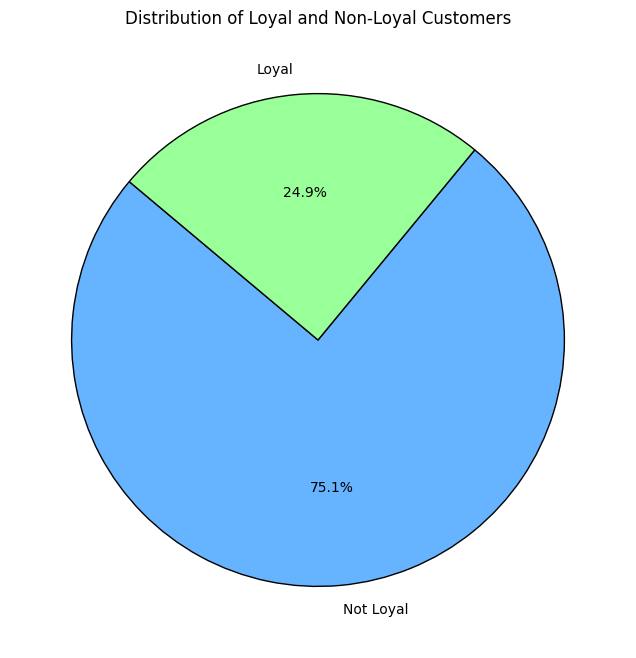

In [ ]:
# Labels for the pie chart
labels = loyalty_counts.index

# Colors for the pie chart
colors = ['#66b3ff','#99ff99']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loyalty_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Distribution of Loyal and Non-Loyal Customers')

# Display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Select relevant features for clustering
features = customer_summary[['Frequency', 'TotalSpent']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

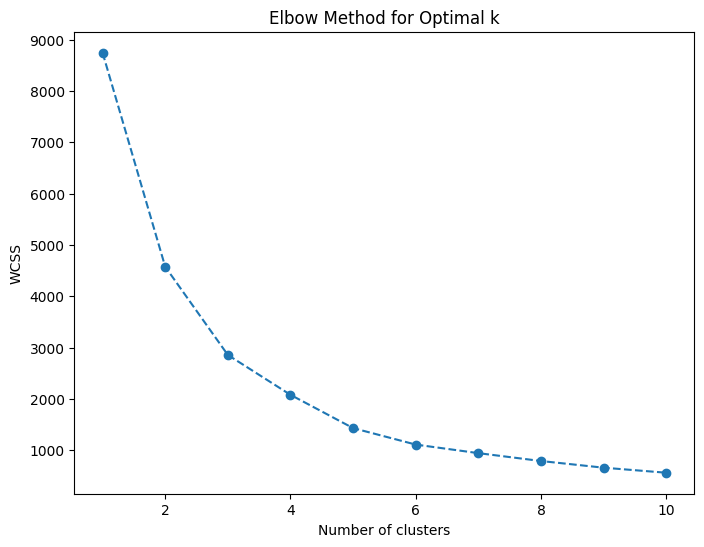

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  max_iter=300, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Apply K-Means with the chosen number of clusters
k = 3  # Example number of clusters
kmeans = KMeans(n_clusters=k, max_iter=300,  random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
customer_summary['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[-0.15725687 -0.0865595 ]
 [11.17547647 21.6719512 ]
 [ 2.46428573  0.88813263]]


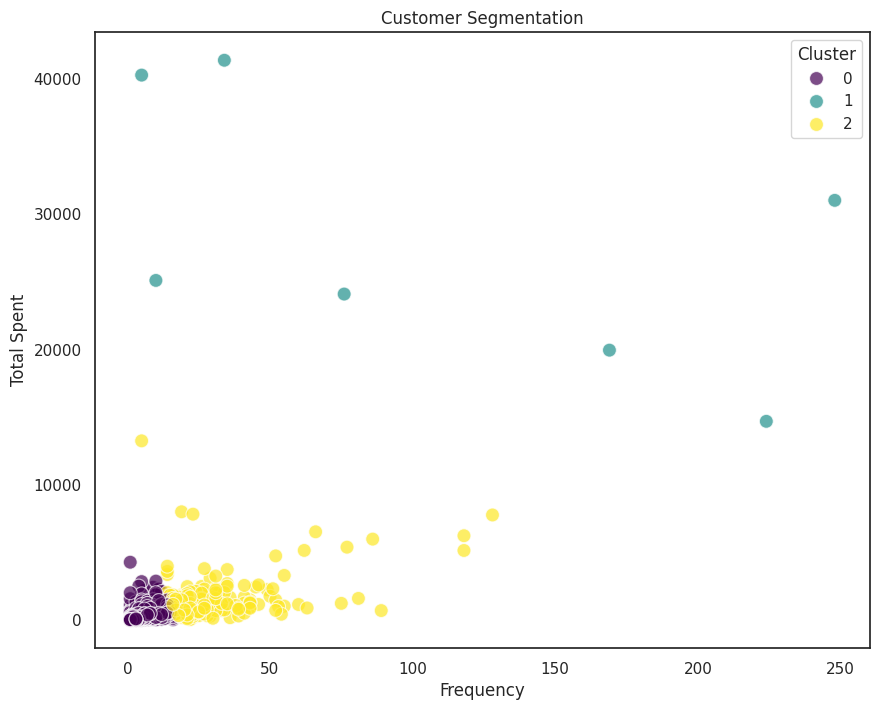

In [ ]:
import seaborn as sns

# Create a DataFrame for plotting
plot_df = customer_summary[['Frequency', 'TotalSpent', 'Cluster']]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='Frequency', y='TotalSpent', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation')
plt.xlabel('Frequency')
plt.ylabel('Total Spent')
plt.legend(title='Cluster')
plt.show()
